In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist


In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 9s 1us/step 


In [20]:
def build_model(optimizer):
    model = keras.Sequential([
        keras.layers.Dense(128, activation="relu", input_shape=(784,)),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(10, activation="softmax")  # 10 output classes for digits (0-9)
    ])
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    return model


In [22]:
optimizers = ["adam", "rmsprop"]
history_dict = {}

for opt in optimizers:
    print(f"Training with {opt} optimizer...")
    model = build_model(opt)
    history = model.fit(
        X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1
    )
    history_dict[opt] = history.history

Training with adam optimizer...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8797 - loss: 0.4265 - val_accuracy: 0.9645 - val_loss: 0.1130
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9675 - loss: 0.1081 - val_accuracy: 0.9707 - val_loss: 0.0926
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9774 - loss: 0.0701 - val_accuracy: 0.9741 - val_loss: 0.0791
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9846 - loss: 0.0487 - val_accuracy: 0.9768 - val_loss: 0.0797
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9874 - loss: 0.0397 - val_accuracy: 0.9762 - val_loss: 0.0820
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9891 - loss: 0.0316 - val_accuracy: 0.9751 - val_loss: 0.0833
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9918 - loss: 0.0248 - val_accuracy: 0.9801 - val_loss: 0.0781
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step

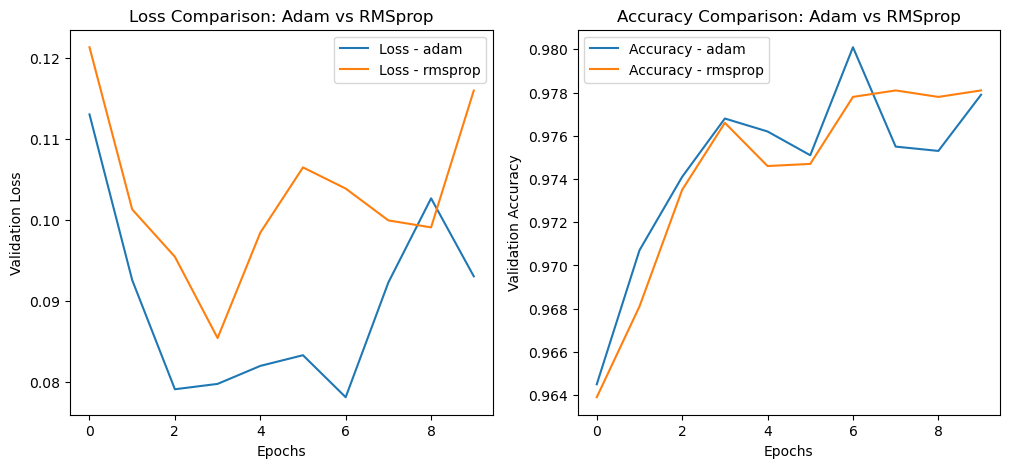

In [25]:
plt.figure(figsize=(12, 5))

# Loss Comparison
plt.subplot(1, 2, 1)
for opt in optimizers:
    plt.plot(history_dict[opt]["val_loss"], label=f"Loss - {opt}")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Loss Comparison: Adam vs RMSprop")
plt.legend()

# Accuracy Comparison
plt.subplot(1, 2, 2)
for opt in optimizers:
    plt.plot(history_dict[opt]["val_accuracy"], label=f"Accuracy - {opt}")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Accuracy Comparison: Adam vs RMSprop")
plt.legend()
plt.show()